In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Cleaned_Data_Merchant_Name.csv')
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [3]:
df[df.Trx_Age == df.Customer_Age]

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders
5,1,16740,1674.0,34,34,F&B,1447,Radha Emporium
6,1,5820,582.0,33,33,F&B,2709,Radha Emporium
...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail


In [4]:
#check for duplicates
df.duplicated().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43672 entries, 0 to 43671
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Trx_Rank             43672 non-null  int64  
 1   Points               43672 non-null  int64  
 2   Trx_Vlu              43672 non-null  float64
 3   Trx_Age              43672 non-null  int64  
 4   Customer_Age         43672 non-null  int64  
 5   Category In English  43672 non-null  object 
 6   User_Id              43672 non-null  int64  
 7   Mer_Name             43672 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.7+ MB


In [6]:
# check for unique customes :
f"We have {df['User_Id'].nunique()} unique customers."

'We have 33457 unique customers.'

In [ ]:
# check for unique merchants :
f"We have {df['Mer_Name'].nunique()} unique merchants."

'We have 56 unique merchants.'

In [ ]:
# check for unique categories :
f"We have {df['Category In English'].nunique()} unique categories."

'We have 7 unique categories.'

In [ ]:
df.groupby("User_Id")['User_Id'].count().to_frame().head(20)

,User_Id
User_Id,
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,2


In [7]:
rfm = df.groupby(['User_Id','Mer_Name']).agg({
    'Trx_Age' : 'min',
    'Trx_Rank' : 'max',
    'Trx_Vlu' : 'sum'
}).reset_index().rename(columns={
    'Trx_Age' : 'Recency',
    'Trx_Rank' : 'Frequency',
    'Trx_Vlu' : 'Monetary'
})

In [8]:
r_groups = pd.qcut(rfm['Recency'],q=5,labels =[5,4,3,2,1] )
f_groups = pd.cut(rfm.Frequency, bins=5 , labels=[1,2,3,4,5])
m_groups = pd.qcut(rfm['Monetary'],q=5,labels=[1,2,3,4,5])

In [9]:
rfm['R'] = r_groups.values
rfm['F'] = f_groups.values
rfm['M'] = m_groups.values

In [10]:
rfm

,User_Id,Mer_Name,Recency,Frequency,Monetary,R,F,M
0,0,Jai Hind General Stores,281,1,442.7,1,1,5
1,1,Agra Appliance Arena,34,1,249.0,5,1,4
2,2,Amritsar Auto Accessories,236,1,300.0,2,1,4
3,3,Agra Appliance Arena,320,1,162.0,1,1,2
4,4,Ranchi Rug Retail,407,1,70.0,1,1,1
...,...,...,...,...,...,...,...,...
36353,33515,Gurgaon Gift Gallery,244,1,48.0,2,1,1
36354,33516,Madurai Music Mania,256,1,132.0,2,1,2
36355,33517,Madurai Music Mania,13,1,210.0,5,1,3
36356,33518,Rajasthan Handicrafts,55,2,372.0,4,1,4


In [11]:
X = rfm[['R','F','M']]

In [12]:
from sklearn.cluster import KMeans , DBSCAN

In [ ]:
sse = []
score = []
for i in range(2,10) :
  kmeans = KMeans(n_clusters = i,init='k-means++' , random_state=0)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
  score.append(silhouette_score(X,kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

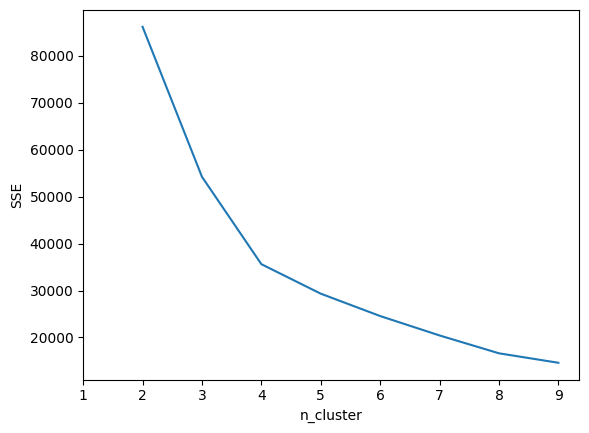

In [ ]:
plt.plot(range(2,10) , sse)
plt.xticks(range(1,10))
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

In [13]:
kmeans = KMeans(n_clusters = 4 , init='k-means++' , random_state=0)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [14]:
kmeans.labels_

array([1, 3, 1, ..., 3, 3, 2], dtype=int32)

In [15]:
rfm['Kmean_Cluster'] = kmeans.labels_

In [ ]:
rfm

,User_Id,Mer_Name,Recency,Frequency,Monetary,R,F,M,Kmean_Cluster
0,0,Jai Hind General Stores,281,1,442.7,1,1,5,1
1,1,Agra Appliance Arena,34,1,249.0,5,1,4,3
2,2,Amritsar Auto Accessories,236,1,300.0,2,1,4,1
3,3,Agra Appliance Arena,320,1,162.0,1,1,2,2
4,4,Ranchi Rug Retail,407,1,70.0,1,1,1,2
...,...,...,...,...,...,...,...,...,...
36353,33515,Gurgaon Gift Gallery,244,1,48.0,2,1,1,2
36354,33516,Madurai Music Mania,256,1,132.0,2,1,2,2
36355,33517,Madurai Music Mania,13,1,210.0,5,1,3,3
36356,33518,Rajasthan Handicrafts,55,2,372.0,4,1,4,3


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler , RobustScaler

In [ ]:
silhouette_score(X,kmeans.labels_)

0.44335873927547353

In [ ]:
sclr = RobustScaler()
scaled_X = X.copy()
scaled_X[scaled_X.columns] = sclr.fit_transform(scaled_X[scaled_X.columns])

In [ ]:
kmeans_scaled = KMeans(n_clusters = 4 , init = 'k-means++' , random_state = 0)
kmeans_scaled.fit(scaled_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [ ]:
silhouette_score(scaled_X,kmeans_scaled.labels_)

0.44648049600851436

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier = AgglomerativeClustering(n_clusters = 3 , linkage = 'ward' , affinity='euclidean')
hier.fit(scaled_X)
silhouette_score(scaled_X,hier.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.39750900511199183

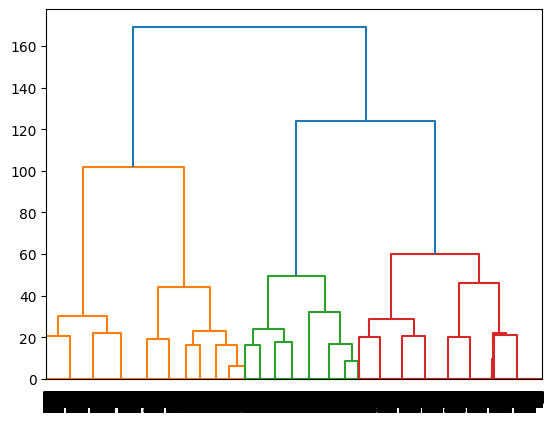

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import sys
from sklearn.cluster import AgglomerativeClustering
sys.setrecursionlimit(10000)

linked = linkage(scaled_X,method='ward')

# Plot dendrogram
dend = dendrogram(linked)

In [16]:
cluster_mapping = rfm.set_index('User_Id')['Kmean_Cluster'].to_dict()

In [17]:
df['Cluster'] = df['User_Id'].map(cluster_mapping)
df.head()

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name,Cluster
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders,1
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders,1
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders,1
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders,2
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders,2


In [ ]:
rfm[rfm.Kmean_Cluster == 0].groupby('Mer_Name')['Frequency'].sum().sort_values(ascending=False)

Mer_Name
Rajasthan Handicrafts           6039
Saraswati Fabrics               1952
Madurai Music Mania              934
Agra Appliance Arena             648
Jai Hind General Stores          628
Amritsar Auto Accessories        433
Indore Instrument Inn            354
Pune Perfumes Paradise           131
Mumbai Fashion Hub               126
Gurgaon Gift Gallery             120
Faridabad Footwear Fair           96
Krishna Textiles                  43
Ranchi Rug Retail                 36
Bhubaneswar Baker's Boutique      24
Punjabi Furniture Palace          18
Vadodara Vegetables Villa         18
Gwalior Garden Gear               17
Cuttack Curtain Corner            16
Delhi Electronics                  9
Lucknow Leather World              8
Thane Tea Traders                  6
Mohan Brothers Mart                3
Radha Emporium                     3
Trichy Tailoring Trends            3
Varanasi Silk House                3
Kochi Kitchenware Kingdom          3
Raipur Rice Retail           

In [20]:
top_df = df.groupby(['Cluster','Category In English'])['Trx_Vlu'].sum().reset_index().sort_values(by=['Cluster','Trx_Vlu'],ascending=[True,False])

In [ ]:
top_df

,Cluster,Category In English,Trx_Vlu
3,0,Grocery,1263409.7
1,0,F&B,292806.7
2,0,Fashion,136982.7
4,0,Health & Beauty,56324.5
6,0,Transportaion,7139.0
0,0,Electronics,4814.0
5,0,Other,360.0
10,1,Grocery,3669988.6
8,1,F&B,1148755.4
9,1,Fashion,703059.3


In [21]:
top_zero = top_df[top_df.Cluster == 0].head(4)['Category In English'].tolist()
top_zero

['Grocery', 'F&B', 'Fashion', 'Health & Beauty']

In [ ]:
top_zero_merchants = []
for category in top_zero :
  top_zero_merchants.append(df[(df.Cluster == 0) & (df['Category In English'] == category)]\
  .groupby('Mer_Name')['Trx_Vlu'].sum().sort_values(ascending= False)[:2].index.tolist())

top_zero_merchants = [item for sublist in top_zero_merchants for item in sublist]
top_zero_merchants

['Rajasthan Handicrafts',
 'Saraswati Fabrics',
 'Jai Hind General Stores',
 'Amritsar Auto Accessories',
 'Agra Appliance Arena',
 'Faridabad Footwear Fair',
 'Indore Instrument Inn',
 'Lucknow Leather World']

In [25]:
products_map = {}
for cluster in range(4) :
  top_categories = top_df[top_df.Cluster == cluster].head(4)['Category In English'].tolist()
  top_products = []
  for category in top_categories :
    top_products.append(df[(df.Cluster == cluster) & (df['Category In English'] == category)]\
    .groupby('Mer_Name')['Trx_Vlu'].sum().sort_values(ascending= False)[:2].index.tolist())
  top_products = [item for sublist in top_products for item in sublist]
  products_map[cluster] = top_products
print(products_map)



{0: ['Rajasthan Handicrafts', 'Saraswati Fabrics', 'Jai Hind General Stores', 'Amritsar Auto Accessories', 'Agra Appliance Arena', 'Faridabad Footwear Fair', 'Indore Instrument Inn', 'Lucknow Leather World'], 1: ['Rajasthan Handicrafts', 'Saraswati Fabrics', 'Jai Hind General Stores', 'Mumbai Fashion Hub', 'Agra Appliance Arena', 'Faridabad Footwear Fair', 'Indore Instrument Inn', 'Thiruvananthapuram Toy Town'], 2: ['Rajasthan Handicrafts', 'Saraswati Fabrics', 'Jai Hind General Stores', 'Gurgaon Gift Gallery', 'Agra Appliance Arena', 'Faridabad Footwear Fair', 'Indore Instrument Inn', 'Hyderabad Spices Bazaar'], 3: ['Rajasthan Handicrafts', 'Madurai Music Mania', 'Agra Appliance Arena', 'Faridabad Footwear Fair', 'Jai Hind General Stores', 'Amritsar Auto Accessories', 'Thane Tea Traders', 'Gwalior Garden Gear']}


In [26]:
df['top_products'] = df['Cluster'].map(products_map)
df

,Trx_Rank,Points,Trx_Vlu,Trx_Age,Customer_Age,Category In English,User_Id,Mer_Name,Cluster,top_products
0,1,20140,2014.0,362,362,Fashion,21053,Shankar Traders,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
1,1,11200,1120.0,371,368,Fashion,26472,Shankar Traders,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
2,2,8500,850.0,368,368,Fashion,26472,Shankar Traders,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
3,1,1980,198.0,558,34,Fashion,27075,Shankar Traders,2,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
4,1,2400,240.0,413,413,Fashion,27417,Shankar Traders,2,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
...,...,...,...,...,...,...,...,...,...,...
43667,1,3050,305.0,27,27,F&B,26865,Cuttack Curtain Corner,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
43668,1,3120,312.0,31,31,F&B,27128,Cuttack Curtain Corner,3,"[Rajasthan Handicrafts, Madurai Music Mania, A..."
43669,1,1200,120.0,25,25,F&B,28814,Cuttack Curtain Corner,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
43670,1,20,2.0,2,2,Other,29107,Rourkela Rice Retail,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."


In [27]:
final_df = df[['User_Id','Cluster','top_products']]

In [33]:
final_df

,User_Id,Cluster,top_products
0,21053,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
1,26472,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
2,26472,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
3,27075,2,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
4,27417,2,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
...,...,...,...
43667,26865,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
43668,27128,3,"[Rajasthan Handicrafts, Madurai Music Mania, A..."
43669,28814,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
43670,29107,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."


In [41]:
test = final_df.drop_duplicates(subset=['User_Id','Cluster'])
test.reset_index(drop=True,inplace=True)
test

,User_Id,Cluster,top_products
0,21053,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
1,26472,1,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
2,27075,2,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
3,27417,2,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
4,1447,3,"[Rajasthan Handicrafts, Madurai Music Mania, A..."
...,...,...,...
33452,19177,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
33453,20060,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."
33454,27128,3,"[Rajasthan Handicrafts, Madurai Music Mania, A..."
33455,28814,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."


In [44]:
test[test.User_Id == 19177]

,User_Id,Cluster,top_products
33452,19177,0,"[Rajasthan Handicrafts, Saraswati Fabrics, Jai..."


In [45]:
test.to_csv('User_Recommendation.csv')